# Text-Preprocessing file

In [248]:
#text preprocess file
import unicodedata
import contractions  
import inflect       
import re
from bs4 import BeautifulSoup
from nltk import sent_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


# Replacing the title in excel sheet

In [565]:
import pandas as pd

xls = pd.ExcelFile('/Users/Sarath/Desktop/term-2/CI/ci_data_with_language/Label sheets/Final_one.xlsx')
df1 = pd.read_excel(xls, 'neg')

In [1]:
#removing the altmeric word in article name
def remove_alt(article_name):
    k = article_name.split()
    a = k[2:]
    article_name = ' '.join(a)
    return article_name
    

In [10]:
df1['article_name'] = df1['article_name'].apply(remove_alt)

In [ ]:
from openpyxl import load_workbook
filepath=r'/Users/Sarath/Desktop/term-2/CI/ci_data_with_language/working_python/new_title_replaced_8.xlsx'
book=load_workbook(filepath)
writer = pd.ExcelWriter(filepath, engine='openpyxl',options={'strings_to_urls': False})
writer.book=book
df.to_excel(writer,sheet_name='tweet')
writer.save()
writer.close()

In [249]:
import warnings
warnings.filterwarnings("ignore")
import re
def clean_tweet(tweet): #remove user name, special characters and urls
    # removing urls
    tweet = re.sub(r'https?://\S+',' ',tweet)
    # removing user names
    user_names = re.findall(r"(@[A-Za-z0-9]+)", tweet)
    #iterating to remove multiple user names
    for i in user_names:
        tweet = re.sub(i,' ', tweet)
    # replacing the special characters and numbers
    tweet = re.sub(r'([^A-Za-z\s])',' ',tweet)
    #replacing multiple spaces in to a single space
    tweet = re.sub(' +',' ', tweet)
    return tweet

# fuzzy function

In [250]:
import re
from fuzzywuzzy import fuzz


In [251]:
from fuzzywuzzy import fuzz
#replacing the tile in tweets
def fuzzy_place_3(str_a, str_b, orig_str):
    text = orig_str
    str_a = str_a
    l = len(str_a.split()) # Length to read orig_str chunk by chunk
    
    for i in range(len(text.split())-l+1):#trying to find the whole title in a tweet
        new_splitted = text.split()
        test = " ".join(new_splitted[i:i+l])
        if fuzz.ratio(str_a, test) > 85: #Using fuzzwuzzy library to test ratio
            before = " ".join(new_splitted[:i])
            after = " ".join(new_splitted[l+i:])
            if before!= '':
                text = before+" "+str_b+" "+after#Output will be sandwich of these three strings
            else: 
                text = str_b+' '+after

    for i in range(len(text.split())-4):#finding the 5 continuous title words in tweet
        n_split = text.split()
        test2 = ' '.join(n_split[i:i+5])
        for j in range(l-5):
            title_split = str_a.split()# to cover the title in the range of 5-8
            title_tes = ' '.join(title_split[j:j+5])
            #print('title_tes', title_tes)
            if fuzz.ratio(title_tes, test2)> 85:
                before = " ".join(n_split[:i])
                after = " ".join(n_split[5+i:])
                if before!= '':
                    text = before+" "+str_b+" "+after#Output will be sandwich of these three strings
                else: 
                    text = str_b+' '+after
                    
                    
    return text
        

# additional features lexicons

In [252]:
#negation count function
import nltk
import nltk.sentiment.sentiment_analyzer 
def negation(tweet):
    a = tweet.split()
    b = nltk.sentiment.util.mark_negation(a)
    tweet = ' '.join(b)
    count = len(re.findall('\w+_NEG', tweet))
    return count

In [253]:
#reading  mpqa lexicon and creating a csv file to use it

import re
f = open('new_lexicon.csv', 'w')
with open('subjclueslen1-HLTEMNLP05.tff', 'rb') as file:
    for line in file.readlines():
        line = str(line)
       
        m = re.search('.*word1=(\S+).*pos1=(\S+).*priorpolarity=(\w+)', line)
        if m.group(3) == 'positive':
            score = 1
        elif m.group(3) == 'negative':
            score = -1
        else:
            score = 0
        f.write("%s,%s,%s\n" % (m.group(1), str(score),m.group(2)))

f.close()

In [254]:
# creating the python dictionary to hold the lexicons
import collections
import csv
lexicon = collections.defaultdict(list)

with open('new_lexicon.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        lexicon[row[0]].append(int(row[1]))
        lexicon[row[0]].append(row[2])
csvFile.close()   


In [255]:
#number of negative words in a tweet
def neg_word_count(tweet):
    count = 0
    for i in tweet.split():
        #print(i)
        if i in lexicon:
            #print(i)
            try: 
                score = lexicon[i][0]
                #print('score',score)
                if score == -1:
                    count+=1            
            except: pass
    return count


#no of positive words in a tweet
def pos_word_count(tweet):
    count = 0
    for i in tweet.split():
        #print(i)
        if i in lexicon:
            #print(i)
            try: 
                score = lexicon[i][0]
                #print('score',score)
                if score == 1:
                    count+=1            
            except: pass
    return count

#overall score of the tweet
def overall_score(tweet):
    score = 0
    for i in tweet.split():
        if i in lexicon:
            try:
                a = lexicon[i][0]
                score += a
            except: 
                pass
    return score

#last token polarity
def las_pol(tweet):
    tweet = tweet.split()
    l_word = tweet[-1]
    score = 0
    if l_word in lexicon:
        a = lexicon[l_word][0]
        #print(a)
        score = a
        #print(score)
    return score

#number of adjectives, adverbs and verbs in a tweet
def pos_POStag_count(tweet):
    count = 0
    l = ['adj','adverb','verb']
    for i in tweet.split():
        if i in lexicon:
            #print(i)
            try:
                pos_tag = lexicon[i][1]
                if pos_tag in l:
                    #print(lexicon[i])
                    if lexicon[i][0] == 1:
                        count+=1

            except: 
                pass
    return count  

#number of adjectives, adverbs and verbs in a tweet
def neg_POStag_count(tweet):
    count = 0
    l = ['adj','adverb','verb']
    for i in tweet.split():
        if i in lexicon:
            #print(i)
            try:
                pos_tag = lexicon[i][1]
                if pos_tag in l:
                    #print(lexicon[i])
                    if lexicon[i][0] == -1:
                        count+=1

            except: 
                pass
    return count  

# Additional Features emoji based

In [256]:
# creating the function to calculate the emoticons count
emoticon_file="emoticons.txt"
emoticons = {}
from pathlib import Path
content = Path(emoticon_file).read_text()
positive = True
for line in content.split("\n"):
    if "positive" in line.lower():
        positive = True
        continue
    elif "negative" in line.lower():
        positive = False
        continue
    emoticons[line] = positive

def pos_emo_count(tweet):
    emo_count = []
    for i in tweet.split():
        if i in emoticons:
            emo_count.append(emoticons[i])
    new_lis = Counter(emo_count)
    #print(new_lis)
    pos_emo_count = new_lis[True]
    #print(pos_emo_count)
    #neg_emo_count = new_lis[False]
    #print(neg_emo_count)
    return pos_emo_count

def neg_emo_count(tweet):
    emo_count = []
    for i in tweet.split():
        if i in emoticons:
            emo_count.append(emoticons[i])
    new_lis = Counter(emo_count)
    #print(new_lis)
    #pos_emo_count = new_lis[True]
    #print(pos_emo_count)
    neg_emo_count = new_lis[False]
    #print(neg_emo_count)
    return neg_emo_count

#count occurences of a ! and ?
def count_occurences(character, word_array):
            counter = 0
            for j, word in enumerate(word_array):
                for char in word:
                    if char == character:
                        counter += 1

            return counter
        
#punctuation count
import string
def punc_count(text):
    for i in text.split():
        count = lambda l1,l2: sum([1 for x in l1 if x in l2])
        punct = count(text,set(string.punctuation))
    return punct
    
# count number of user name mentions
def user_mention_count(tweet):
    user_names = re.findall(r"(@[A-Za-z0-9]+)", tweet)
    count= len(user_names)
    return count 

#average word length
def avg_word(tweet):
    words = tweet.split()
    return (sum(len(word) for word in words)/len(words))

# Building the model

In [257]:
import pandas as pd
xls = pd.ExcelFile('df_title_replaced.xlsx')
neg_df = pd.read_excel(xls, 'neg')
pos_df = pd.read_excel(xls, 'pos')
neu_df = pd.read_excel(xls, 'neu')

In [258]:
from sklearn.utils import shuffle
neg_df = shuffle(neg_df)
print(len(neg_df))
print(len(pos_df))
print(len(neu_df))


999
1671
3392


In [259]:
neg_df.reset_index(drop=True, inplace= True)
pos_df.reset_index(drop=True, inplace= True)
neu_df.reset_index(drop=True, inplace= True)

In [260]:
neg_train_df = neg_df[:900]
neg_val_df = neg_df[900:]
pos_train_df = pos_df[:900]
pos_val_df = pos_df[900:1100]
neu_train_df = neu_df[:900]
neu_val_df = neu_df[900:1100]

In [261]:
train_df = neg_train_df.append(pos_train_df, ignore_index= True)
train_df = train_df.append(neu_train_df, ignore_index= True)

In [262]:
len(train_df)

2700

In [263]:
test_df = neg_val_df.append(pos_val_df, ignore_index= True)
test_df = test_df.append(neu_val_df, ignore_index= True)

In [264]:
len(test_df)

499

In [265]:
df = train_df.append(test_df, ignore_index= True)

In [266]:
new_tweet_post = []
for article, tpost in zip(df.article_name, df.tweet_post):
    new_post = fuzzy_place_3(article, "stitlee", tpost)
    new_tweet_post.append(new_post)

In [267]:
df['new_tweet_post'] = new_tweet_post

In [34]:
df['new_tweet_post'].isnull().sum()

0

In [268]:
#from textpreprocess import denoise_text, normalize, replace_contractions, remove_non_ascii, to_lowercase, remove_punctuation, replace_numbers, remove_stopwords, lemmatize_verbs
def preprocess(text):
    text = replace_contractions(text)
    content = nltk.word_tokenize(text)
    words = remove_non_ascii(content)
    words = to_lowercase(words)
    words = lemmatize_verbs(words)#lemmatising verbs
    #words = stem_words(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    #words = remove_stopwords(words)
    text = ' '.join(words)
    return text

#Tried stemmer but didnt give good results lemmatising the words gave better results
#tried tweets without changing their case but it wasnt either improving the model performance
#lemmatisation of words and changing the case of words in tweets produced better results with svm

In [269]:
df['Label'] = df['Label'].replace(['Neu'], 'Neutral')
df['Label'] = df['Label'].replace(['Neg','N'], 'Negative')
df['Label'] = df['Label'].replace(['Pos'], 'Positive')

In [37]:
df['new_tweet_post'] = df['new_tweet_post'].apply(clean_tweet)

In [38]:
nltk.download('wordnet')
df['new_tweet_post'] = df['new_tweet_post'].apply(preprocess)

[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
df['Label'].value_counts()

Positive    1100
Neutral     1100
Negative     999
Name: Label, dtype: int64

In [40]:
df_train = df[:2700]
df_test = df[2700:]

In [105]:
x_train = df_train['new_tweet_post']
y_train = df_train['Label']
x_test = df_test['new_tweet_post']
y_test = df_test['Label']

In [106]:
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# x_train, x_valid, y_train, y_valid = train_test_split(df_train['new_tweet_post'], df_train['Label'], 
#                                                                       random_state=2,test_size=0.05, stratify=df_train['Label'])

In [107]:
y_train.value_counts()

Neutral     900
Positive    900
Negative    900
Name: Label, dtype: int64

In [108]:
y_test.value_counts()

Positive    200
Neutral     200
Negative     99
Name: Label, dtype: int64

In [109]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vec = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2))
xtrain_count = count_vec.fit_transform(x_train)
xtest_count = count_vec.transform(x_test)

In [111]:
print(xtrain_count.shape)
print(y_train.shape)
print(xtest_count.shape)
print(y_test.shape)

(2700, 21934)
(2700,)
(499, 21934)
(499,)


In [112]:
from sklearn import naive_bayes
classifier = naive_bayes.MultinomialNB()


In [113]:
classifier.fit(xtrain_count, y_train)
predictions = classifier.predict(xtest_count)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test, predictions)

0.7915831663326653

In [115]:
import pandas as pd
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm.T, index=classifier.classes_, columns=classifier.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        0    1    2
Predicted              
0          86    8   31
1           8  156   16
2           5   36  153


In [116]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.69      0.87      0.77        99
          1       0.87      0.78      0.82       200
          2       0.79      0.77      0.78       200

avg / total       0.80      0.79      0.79       499



In [117]:
from sklearn import svm
classifier_svm = svm.SVC()

In [118]:
classifier_svm.fit(xtrain_count, y_train)
svm_predictions = classifier_svm.predict(xtest_count)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test,svm_predictions)

0.6492985971943888

In [120]:
print(classification_report(y_test,svm_predictions))

             precision    recall  f1-score   support

          0       0.61      0.34      0.44        99
          1       0.61      0.86      0.72       200
          2       0.73      0.58      0.65       200

avg / total       0.66      0.65      0.63       499



In [121]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=100)

In [122]:
classifier_RF.fit(xtrain_count, y_train)
RF_predictions = classifier_svm.predict(xtest_count)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test,RF_predictions)

0.6492985971943888

In [124]:
print(classification_report(y_test,RF_predictions))

             precision    recall  f1-score   support

          0       0.61      0.34      0.44        99
          1       0.61      0.86      0.72       200
          2       0.73      0.58      0.65       200

avg / total       0.66      0.65      0.63       499



In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

pipeline = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=10000)),
    ('clf', svm.SVC())
])

# binary in TfidfVectorizer(): if True, all non-zero term counts are set to 1. 
# This does not mean outputs will have only 0/1 values, only that the tf term in tf-idf is binary.
parameters = {
    'clf__kernel':('rbf','linear'),
    'vect__max_df': (0.1, 0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    #'vect__lowercase': (True, False),
    'vect__binary': (True, False),
    #'vect__max_features': (5000, 10000),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2', None),
    "clf__C": [0.5, 1, 10, 100],
    'clf__gamma': [1e-2, 1e-3, 1e-4]
}

if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
    grid_search.fit(x_train, y_train)
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    #for param_name in sorted(parameters.keys()):
     #   print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions_pip = grid_search.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, predictions_pip))

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
for param_name in sorted(parameters.keys()):
    print('%r: %s' % (param_name, best_parameters[param_name]))

# Additional Features

In [118]:
df['new_tweet_post'] = new_tweet_post

In [270]:
import numpy as np
from collections import Counter
def additional_features(df):
    #number of upper case words 
    df['number_of_uppercase'] = df['new_tweet_post'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    #number of urls
    #df['number_of_urls'] = df['tweet_post'].apply(lambda x: len(re.findall(r'https?://\S+',str(x))))
    #number of hashtags in a tweet
    df['number_of_hashtags'] = df['tweet_post'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    #number of negated context in a tweet
    df['number_of_negation'] = df['new_tweet_post'].apply(negation)
    #number of words in a tweet
    #df['word_count'] = df['new_tweet_post'].apply(lambda x: len(str(x).split(" ")))
    #average word length
    #df['avg_word_length'] = df['new_tweet_post'].apply(avg_word)
    #number of negative word count
    df['neg_count'] = df['new_tweet_post'].apply(neg_word_count)
    #number of positive word count
    df['pos_count']= df['new_tweet_post'].apply(pos_word_count)
    #sum of overall_score 
    df['overall_score'] = df['new_tweet_post'].apply(overall_score)
    #number of exclamation marks
    df['Exclamation_count'] =  np.vectorize(count_occurences)('!',df['tweet_post'])
    #number of question marks
    df['question_mark_count'] =  np.vectorize(count_occurences)('?',df['tweet_post'])
    #number of punctuations
    #df['punc_count'] = df['new_tweet_post'].apply(punc_count)
    #number of user mentions in tweet
    df['user_mention_count'] = df['tweet_post'].apply(user_mention_count)
    #count_emoticons
    #df['pos_emo_count'] = df['tweet_post'].apply(pos_emo_count)
    #df['neg_emo_count'] = df['tweet_post'].apply(neg_emo_count)
    
    df['new_tweet_post'] = df['new_tweet_post'].apply(clean_tweet)
    df['new_tweet_post'] = df['new_tweet_post'].apply(preprocess)
    
    df['last_word_polarity'] = df['new_tweet_post'].apply(las_pol)#run this after preprocessing
    #number of pos tagging do after preprocessing of the tweets
    df['pos_POStag_count'] = df['new_tweet_post'].apply(pos_POStag_count)
    df['neg_POStag_count'] = df['new_tweet_post'].apply(neg_POStag_count)
    return df

In [271]:
df= additional_features(df)

In [272]:
df['pos_POStag_count'].value_counts()

0    1389
1    1194
2     414
3     146
4      34
5      17
6       4
8       1
Name: pos_POStag_count, dtype: int64

In [273]:
df['overall_score'].describe()

count    3199.000000
mean        0.101282
std         1.143979
min        -4.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: overall_score, dtype: float64

In [274]:
df_train = df[:2700]
df_test = df[2700:]

In [275]:
len(df_train)

2700

In [276]:
x_train = df_train[df_train.columns[15:]] 
y_train = df_train[df_train.columns[14]] 

In [277]:
x_test = df_test[df_train.columns[15:]] 
y_test = df_test[df_train.columns[14]] 

In [278]:
y_train.value_counts()

Positive    900
Negative    900
Neutral     900
Name: Label, dtype: int64

In [279]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2700, 13)
(2700,)
(499, 13)
(499,)


In [280]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [52]:
def norm(x_train):
    x_train[['number_of_uppercase','number_of_hashtags']] = mms.fit_transform(x_train[['number_of_uppercase','number_of_hashtags']])
    x_train[['pos_emo_count','neg_emo_count','last_word_polarity']] = mms.fit_transform(x_train[['pos_emo_count','neg_emo_count','last_word_polarity']])
    x_train[['user_mention_count','pos_POStag_count', 'neg_POStag_count']] = mms.fit_transform(x_train[['user_mention_count','pos_POStag_count', 'neg_POStag_count']])
    x_train[['overall_score','Exclamation_count','question_mark_count']] = mms.fit_transform(x_train[['overall_score','Exclamation_count','question_mark_count']])
    x_train[['number_of_negation','neg_count','pos_count']] = mms.fit_transform(x_train[['number_of_negation','neg_count','pos_count']])
    return x_train

In [281]:
x_train[['number_of_uppercase','number_of_hashtags']] = mms.fit_transform(x_train[['number_of_uppercase','number_of_hashtags']])
x_train[['last_word_polarity']] = mms.fit_transform(x_train[['last_word_polarity']])
x_train[['user_mention_count','pos_POStag_count', 'neg_POStag_count']] = mms.fit_transform(x_train[['user_mention_count','pos_POStag_count', 'neg_POStag_count']])
x_train[['overall_score','Exclamation_count','question_mark_count']] = mms.fit_transform(x_train[['overall_score','Exclamation_count','question_mark_count']])
x_train[['number_of_negation','neg_count','pos_count']] = mms.fit_transform(x_train[['number_of_negation','neg_count','pos_count']])

In [282]:
x_test[['number_of_uppercase','number_of_hashtags']] = mms.fit_transform(x_test[['number_of_uppercase','number_of_hashtags']])
x_test[['last_word_polarity']] = mms.fit_transform(x_test[['last_word_polarity']])
x_test[['user_mention_count','pos_POStag_count', 'neg_POStag_count']] = mms.fit_transform(x_test[['user_mention_count','pos_POStag_count', 'neg_POStag_count']])
x_test[['overall_score','Exclamation_count','question_mark_count']] = mms.fit_transform(x_test[['overall_score','Exclamation_count','question_mark_count']])
x_test[['number_of_negation','neg_count','pos_count']] = mms.fit_transform(x_test[['number_of_negation','neg_count','pos_count']])

In [283]:
x_train['overall_score'].describe()

count    2700.000000
mean        0.372256
std         0.105512
min         0.000000
25%         0.363636
50%         0.363636
75%         0.454545
max         1.000000
Name: overall_score, dtype: float64

In [284]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [285]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)

{'Neutral': 1, 'Negative': 0, 'Positive': 2}


In [136]:
x_train.columns

Index(['new_tweet_post', 'number_of_uppercase', 'number_of_hashtags',
       'number_of_negation', 'neg_count', 'pos_count', 'overall_score',
       'Exclamation_count', 'question_mark_count', 'user_mention_count',
       'pos_emo_count', 'neg_emo_count', 'last_word_polarity',
       'pos_POStag_count', 'neg_POStag_count'],
      dtype='object')

# Using TF-IDF vectoriser with additional features

In [105]:
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
mapper = DataFrameMapper([
     ('new_tweet_post',TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,2), max_df=0.5, norm='l2')),
     ('number_of_uppercase', None),
#      ('number_of_urls',None),
     ('number_of_hashtags',None),
     ('number_of_negation',None),
     ('neg_count',None),
     ('pos_count',None),
     ('overall_score',None),
     ('Exclamation_count',None),
     ('question_mark_count',None),
#      ('punc_count',None),
     ('user_mention_count',None),
     ('neg_POStag_count',None),
     ('pos_POStag_count',None),
     ('pos_emo_count',None),
     ('neg_emo_count',None),
#    ('word_count', None),
    ('last_word_polarity',None),
    #('avg_word_length', None)
])

In [106]:
x_train.columns

Index(['new_tweet_post', 'number_of_uppercase', 'number_of_hashtags',
       'number_of_negation', 'neg_count', 'pos_count', 'overall_score',
       'Exclamation_count', 'question_mark_count', 'user_mention_count',
       'pos_emo_count', 'neg_emo_count', 'last_word_polarity',
       'pos_POStag_count', 'neg_POStag_count'],
      dtype='object')

In [107]:
xn_train = mapper.fit_transform(x_train)
xn_test = mapper.transform(x_test)

# naive-bayes

In [49]:
from sklearn import naive_bayes
classifier = naive_bayes.MultinomialNB()


In [50]:
classifier.fit(xn_train, y_train)
predictions_1 = classifier.predict(xn_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test, predictions_1)

0.8196392785571143

In [51]:
import pandas as pd
cm = confusion_matrix(y_test, predictions_1)
cm_df = pd.DataFrame(cm.T, index=classifier.classes_, columns=classifier.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)



True        0    1    2
Predicted              
0          88    6   18
1           4  151   11
2           7   43  171


In [52]:
print(classification_report(y_test,predictions_1))

             precision    recall  f1-score   support

          0       0.79      0.89      0.83        99
          1       0.91      0.76      0.83       200
          2       0.77      0.85      0.81       200

avg / total       0.83      0.82      0.82       499



# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=100)

In [ ]:
classifier_RF.fit(x_train, y_train)
predictions = classifier_RF.predict(x_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test, predictions)

0.779559118236473

In [92]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.66      0.88      0.76        99
          1       0.81      0.80      0.80       200
          2       0.84      0.71      0.77       200

avg / total       0.79      0.78      0.78       499



# SVM

from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')

In [ ]:
classifier_svm.fit(xn_train, y_train)
predictions_2 = classifier_svm.predict(xn_test)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test, predictions_2)

0.8637274549098196

In [111]:
import pandas as pd
cm = confusion_matrix(y_test, predictions_2)
cm_df = pd.DataFrame(cm.T, index=classifier_svm.classes_, columns=classifier_svm.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        0    1    2
Predicted              
0          90   11   15
1           4  166   10
2           5   23  175


In [84]:
print(classification_report(y_test,predictions_2))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80        99
          1       0.91      0.81      0.86       200
          2       0.82      0.86      0.84       200

avg / total       0.84      0.84      0.84       499



# Using count vectoriser along with dataframe mapper

In [114]:
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
mapper = DataFrameMapper([
     ('new_tweet_post',CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1))),
     ('number_of_uppercase', None),
#      ('number_of_urls',None),
     ('number_of_hashtags',None),
     ('number_of_negation',None),
     ('neg_count',None),
     ('pos_count',None),
     ('overall_score',None),
     ('Exclamation_count',None),
     ('question_mark_count',None),
#      ('punc_count',None),
     ('user_mention_count',None),
     ('neg_POStag_count',None),
     ('pos_POStag_count',None),
     ('pos_emo_count',None),
     ('neg_emo_count',None),
#    ('word_count', None),
    ('last_word_polarity',None),
    #('avg_word_length', None)
])

In [115]:
x_train = mapper.fit_transform(x_train)
x_test = mapper.transform(x_test)

In [103]:
from sklearn import naive_bayes
classifier = naive_bayes.MultinomialNB()
classifier.fit(x_train, y_train)
predictions_1 = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test, predictions_1)

0.811623246492986

In [104]:
print(classification_report(y_test,predictions_1))

             precision    recall  f1-score   support

          0       0.71      0.93      0.80        99
          1       0.91      0.78      0.84       200
          2       0.79      0.79      0.79       200

avg / total       0.82      0.81      0.81       499



In [116]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(x_train, y_train)
predictions_3 = classifier_svm.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
accuracy_score(y_test, predictions_3)

0.8496993987975952

In [117]:
print(classification_report(y_test,predictions_2))

             precision    recall  f1-score   support

          0       0.78      0.91      0.84        99
          1       0.92      0.83      0.87       200
          2       0.86      0.88      0.87       200

avg / total       0.87      0.86      0.86       499



# Pipeline for addtional features

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None): # fit() doesn't do anything
        return self

    def transform(self, X):   # all the work is done here
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]


In [114]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

new_tweet_post = Pipeline([
                ('selector', TextSelector(key='new_tweet_post')),
                ('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,2), max_df=0.5, norm='l2'))
            ])

number_of_uppercase =  Pipeline([
                ('selector', NumberSelector(key='number_of_uppercase')),
                ('standard', MinMaxScaler())
            ])
#number_of_urls =  Pipeline([
#                 ('selector', NumberSelector(key='number_of_urls')),
#                 ('standard', MinMaxScaler())
#             ])
number_of_hashtags =  Pipeline([
                ('selector', NumberSelector(key='number_of_hashtags')),
                ('standard', MinMaxScaler())
            ])
number_of_negation =  Pipeline([
                ('selector', NumberSelector(key='number_of_negation')),
                ('standard', MinMaxScaler())
            ])
neg_count =  Pipeline([
                ('selector', NumberSelector(key='neg_count')),
                ('standard', MinMaxScaler())
            ])
pos_count =  Pipeline([
                ('selector', NumberSelector(key='pos_count')),
                ('standard', MinMaxScaler())
            ])
overall_score =  Pipeline([
                ('selector', NumberSelector(key='overall_score')),
                ('standard', MinMaxScaler())
            ])
Exclamation_count =  Pipeline([
                ('selector', NumberSelector(key='Exclamation_count')),
                ('standard', MinMaxScaler())
            ])
question_mark_count =  Pipeline([
                ('selector', NumberSelector(key='question_mark_count')),
                ('standard', MinMaxScaler())
            ])
user_mention_count =  Pipeline([
                ('selector', NumberSelector(key='user_mention_count')),
                ('standard', MinMaxScaler())
            ])
pos_emo_count =  Pipeline([
                ('selector', NumberSelector(key='pos_emo_count')),
                ('standard', MinMaxScaler())
            ])
neg_emo_count =  Pipeline([
                ('selector', NumberSelector(key='neg_emo_count')),
                ('standard', MinMaxScaler())
            ])
last_word_polarity =  Pipeline([
                ('selector', NumberSelector(key='last_word_polarity')),
                ('standard', MinMaxScaler())
            ])
pos_POStag_count =  Pipeline([
                ('selector', NumberSelector(key='pos_POStag_count')),
                ('standard', MinMaxScaler())
            ])
neg_POStag_count =  Pipeline([
                ('selector', NumberSelector(key='neg_POStag_count')),
                ('standard', MinMaxScaler())
            ])

In [115]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('new_tweet_post', new_tweet_post), 
                      ('number_of_uppercase', number_of_uppercase),
                      #('number_of_urls', number_of_urls),
                      ('number_of_hashtags', number_of_hashtags),
                      ('number_of_negation', number_of_negation),
                      ('neg_count', neg_count),
                      ('pos_count', pos_count),
                      ('overall_score', overall_score),
                      ('Exclamation_count', Exclamation_count),
                      ('question_mark_count', question_mark_count),
                      ('user_mention_count', user_mention_count),
                      ('pos_emo_count', pos_emo_count),
                      ('neg_emo_count', neg_emo_count),
                      ('last_word_polarity', last_word_polarity),
                      ('pos_POStag_count', pos_POStag_count),
                      ('neg_POStag_count', neg_POStag_count)])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(x_train) 

<2700x21965 sparse matrix of type '<class 'numpy.float64'>'
	with 79739 stored elements in Compressed Sparse Row format>

In [116]:
feature_processing.transform(x_test)

<499x21965 sparse matrix of type '<class 'numpy.float64'>'
	with 10568 stored elements in Compressed Sparse Row format>

In [120]:
import numpy as np
from sklearn import svm

pipeline = Pipeline([
    ('features',feats),
    ('classifier', svm.SVC(kernel='linear'))
])

In [121]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [122]:
pipeline.fit(x_train, y_train)
preds = pipeline.predict(x_test)
np.mean(preds == y_test)

0.8637274549098196

In [123]:
import pandas as pd
cm = confusion_matrix(y_test, predictions_1)
cm_df = pd.DataFrame(cm.T, index=classifier.classes_, columns=classifier.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        0    1    2
Predicted              
0          88    6   18
1           4  151   11
2           7   43  171


In [60]:
pipeline.get_params().keys()

dict_keys(['features__new_tweet_post__tfidf__min_df', 'features__question_mark_count', 'features__pos_count__standard__copy', 'features__user_mention_count__selector', 'features__user_mention_count__standard', 'features__pos_emo_count__standard', 'features__number_of_negation', 'features__Exclamation_count__standard__copy', 'features__new_tweet_post__tfidf__smooth_idf', 'features__neg_POStag_count__standard', 'features__new_tweet_post__selector__key', 'features__neg_emo_count__memory', 'features__pos_POStag_count__standard__feature_range', 'features__pos_count__selector', 'classifier__tol', 'features__new_tweet_post', 'features__number_of_hashtags__standard__copy', 'features__question_mark_count__standard__copy', 'features__overall_score__selector', 'features__number_of_hashtags__steps', 'classifier__degree', 'features__pos_emo_count__selector__key', 'features__number_of_negation__selector', 'classifier__max_iter', 'features__user_mention_count__steps', 'memory', 'features__neg_count__

In [110]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'features__new_tweet_post__tfidf__max_df': [0.5, 0.75],
                   'features__new_tweet_post__tfidf__norm':('l1', 'l2'),
                   #'features__new_tweet_post__tfidf__stop_words':('english', None),
                    'features__new_tweet_post__tfidf__ngram_range': [(1,1), (1,2)],
                   #'features__new_tweet_post__tfidf__binary':(True,False),
                   #'features__new_tweet_post__tfidf__use_idf':(True,False),
                    'classifier__C': (0.5, 1, 10),
                    'classifier__gamma': (1e-2, 1e-3),
                    'classifier__kernel': ('linear', 'rbf')
                  }
clf = GridSearchCV(pipeline, hyperparameters, cv=3)

In [111]:
# Fit and tune model
clf.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('new_tweet_post', Pipeline(memory=None,
     steps=[('selector', TextSelector(key='new_tweet_post')), ('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='ut...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'features__new_tweet_post__tfidf__ngram_range': [(1, 1), (1, 2)], 'classifier__kernel': ('linear', 'rbf'), 'features__new_tweet_post__tfidf__norm': ('l1', 'l2'), 'classifier__C': (0.5, 1, 10), 'features__new_tweet_post__tfidf__max_df': [0.5, 0.75], 'classifier__gamma': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
preds_2 = clf.predict(x_test)
np.mean(preds == y_test)

0.8176352705410822

In [112]:
clf.best_params_

{'classifier__C': 1,
 'classifier__gamma': 0.01,
 'classifier__kernel': 'linear',
 'features__new_tweet_post__tfidf__max_df': 0.5,
 'features__new_tweet_post__tfidf__ngram_range': (1, 1),
 'features__new_tweet_post__tfidf__norm': 'l2'}

# testing the model on another set of files

In [6]:
pos_val_df2 = pos_df[1100:]
neu_val_df2 = neu_df[1100:]

In [8]:
df_2 = neu_val_df2.append(pos_val_df2, ignore_index= True)

In [10]:
len(df_2)

2863

In [42]:
new_tweet_post = []
for article, tpost in zip(df_2.article_name, df_2.tweet_post):
    new_post = fuzzy_place_3(article, "stitlee", tpost)
    new_tweet_post.append(new_post)

In [43]:
df_2['Label'] = df_2['Label'].replace(['Neu'], 'Neutral')
df_2['Label'] = df_2['Label'].replace(['Neg','N'], 'Negative')
df_2['Label'] = df_2['Label'].replace(['Pos'], 'Positive')

In [44]:
df_2['Label'].value_counts()

Neutral     2292
Positive     571
Name: Label, dtype: int64

In [53]:
df_2['new_tweet_post'] = new_tweet_post

In [54]:
df_2 = additional_features(df_2)

In [55]:
df_2.columns

Index(['citation', 'altid', 'count', 'profile_link', 'profile_name',
       'display_name', 'tweet_post', 'post_time', 'post_URL', 'article_name',
       'Language', 'sentiment', 'subjectivity', 'polarity', 'Label',
       'new_tweet_post', 'number_of_uppercase', 'number_of_hashtags',
       'number_of_negation', 'neg_count', 'pos_count', 'overall_score',
       'Exclamation_count', 'question_mark_count', 'user_mention_count',
       'pos_emo_count', 'neg_emo_count', 'last_word_polarity',
       'pos_POStag_count', 'neg_POStag_count'],
      dtype='object')

In [400]:
df_train.columns
  

Index(['citation', 'altid', 'count', 'profile_link', 'profile_name',
       'display_name', 'tweet_post', 'post_time', 'post_URL', 'article_name',
       'Language', 'sentiment', 'subjectivity', 'polarity', 'Label',
       'new_tweet_post', 'number_of_uppercase', 'number_of_urls',
       'number_of_hashtags', 'number_of_negation', 'neg_count', 'pos_count',
       'overall_score', 'Exclamation_count', 'question_mark_count',
       'user_mention_count', 'pos_emo_count', 'neg_emo_count',
       'last_word_polarity', 'pos_POStag_count', 'neg_POStag_count'],
      dtype='object')

In [51]:
import pandas as pd
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

pipeline = Pipeline([
    ('vect', mapper),
    ('clf', svm.SVC())
])
parameters = {'clf__kernel':['']
    "clf__C": [0.1, 1, 10, 100],
    'clf__gamma': [1e-2, 1e-3, 1e-4]
}

In [52]:
if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
    grid_search.fit(x_train, y_train)
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    #for param_name in sorted(parameters.keys()):
     #   print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, predictions))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


JoblibIndexError: JoblibIndexError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Sarath\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Sarath\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x01F55440, file "C:\Us...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Sarath\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\S...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x01F55440, file "C:\Us...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Sarath\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\S...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    492         if self.poller is not None:
    493             self.poller.start()
    494         self.kernel.start()
    495         self.io_loop = ioloop.IOLoop.current()
    496         try:
--> 497             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    498         except KeyboardInterrupt:
    499             pass
    500 
    501 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\Sarath\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\Sarath\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(340, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\Sarath\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(340, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (340, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=340, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 28, 8, 36, 24, 323722, tzinfo=tzutc()), 'msg_id': '54d32f74d0e04b4c8f6a1f6ab4feeff8', 'msg_type': 'execute_request', 'session': '9a89fd109ead475682fddc7b9f263ebf', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '54d32f74d0e04b4c8f6a1f6ab4feeff8', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9a89fd109ead475682fddc7b9f263ebf']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 28, 8, 36, 24, 323722, tzinfo=tzutc()), 'msg_id': '54d32f74d0e04b4c8f6a1f6ab4feeff8', 'msg_type': 'execute_request', 'session': '9a89fd109ead475682fddc7b9f263ebf', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '54d32f74d0e04b4c8f6a1f6ab4feeff8', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9a89fd109ead475682fddc7b9f263ebf'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 28, 8, 36, 24, 323722, tzinfo=tzutc()), 'msg_id': '54d32f74d0e04b4c8f6a1f6ab4feeff8', 'msg_type': 'execute_request', 'session': '9a89fd109ead475682fddc7b9f263ebf', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '54d32f74d0e04b4c8f6a1f6ab4feeff8', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='if __name__ == "__main__":\n    grid_search = Gri...\'Accuracy:\', accuracy_score(y_test, predictions))', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.If object>], cell_name='<ipython-input-52-d9eff0b324cd>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 10b952b0, execution_c...rue silent=False shell_futures=True> result=None>)
   2896             raise ValueError("Interactivity was %r" % interactivity)
   2897         try:
   2898             for i, node in enumerate(to_run_exec):
   2899                 mod = ast.Module([node])
   2900                 code = compiler(mod, cell_name, "exec")
-> 2901                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10C906A8, file "<ipython-input-52-d9eff0b324cd>", line 1>
        result = <ExecutionResult object at 10b952b0, execution_c...rue silent=False shell_futures=True> result=None>
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10C906A8, file "<ipython-input-52-d9eff0b324cd>", line 1>, result=<ExecutionResult object at 10b952b0, execution_c...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10C906A8, file "<ipython-input-52-d9eff0b324cd>", line 1>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'DataFrameMapper': <class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "#removing the altmeric word in article name\ndef ...e_name = ' '.join(a)\n    return article_name\n    ", 'from fuzzywuzzy import fuzz\n#replacing the tile ...           print(text)\n    return text\n    \n     ', 'from fuzzywuzzy import fuzz\nimport warnings\nwarn...           print(text)\n    return text\n    \n     ', 'def fuzzy_place_3(str_a, str_b, orig_str):\n    t...   \n                    \n    return text\n        ', 'import re\nfrom fuzzywuzzy import fuzz', "#negation count function\nimport nltk\nimport nltk...en(re.findall('\\w+_NEG', tweet))\n    return count", '#number of negative words in a tweet\ndef neg_wor...       \n            except: pass\n    return count', '#no of positive words in a tweet\ndef pos_word_co...       \n            except: pass\n    return count', '#overall score of the tweet\ndef overall_score(tw...   except: \n                pass\n    return score', '#number of adjectives, adverbs and verbs in a tw...cept: pass        \n    return count              ', '# creating the function to calculate the emotico...   #print(neg_emo_count)\n    return neg_emo_count', '#count occurences of a ! and ?\ndef count_occuren...         counter += 1\n\n            return counter', '#punctuation count\nimport string\ndef punc_count(...t(string.punctuation))\n    return punct\n    \n    ', '# count number of user name mentions\ndef user_me...weet)\n    count= len(user_names)\n    return count', "import pandas as pd\nxls = pd.ExcelFile('/Users/S...el(xls, 'pos')\nneu_df = pd.read_excel(xls, 'neu')", 'print(len(neg_df))\nprint(len(pos_df))\nprint(len(neu_df))', 'neg_df.reset_index(drop=True, inplace= True)\npos...rue)\nneu_df.reset_index(drop=True, inplace= True)', 'neg_train_df = neg_df[:800]\nneg_val_df = neg_df[...n_df = neu_df[:900]\nneu_val_df = neu_df[900:1100]', 'train_df = neg_train_df.append(pos_train_df, ign...train_df.append(neu_train_df, ignore_index= True)', ...], 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {20: 2600, 22: 449, 26: 3049, 29: Positive    1100
Neutral     1100
Negative     849
Name: Label, dtype: int64, 39: count    3049.000000
mean        9.824205
std   ...2.000000
Name: user_mention_count, dtype: float64, 42: 2600}, 'Path': <class 'pathlib.Path'>, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'DataFrameMapper': <class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "#removing the altmeric word in article name\ndef ...e_name = ' '.join(a)\n    return article_name\n    ", 'from fuzzywuzzy import fuzz\n#replacing the tile ...           print(text)\n    return text\n    \n     ', 'from fuzzywuzzy import fuzz\nimport warnings\nwarn...           print(text)\n    return text\n    \n     ', 'def fuzzy_place_3(str_a, str_b, orig_str):\n    t...   \n                    \n    return text\n        ', 'import re\nfrom fuzzywuzzy import fuzz', "#negation count function\nimport nltk\nimport nltk...en(re.findall('\\w+_NEG', tweet))\n    return count", '#number of negative words in a tweet\ndef neg_wor...       \n            except: pass\n    return count', '#no of positive words in a tweet\ndef pos_word_co...       \n            except: pass\n    return count', '#overall score of the tweet\ndef overall_score(tw...   except: \n                pass\n    return score', '#number of adjectives, adverbs and verbs in a tw...cept: pass        \n    return count              ', '# creating the function to calculate the emotico...   #print(neg_emo_count)\n    return neg_emo_count', '#count occurences of a ! and ?\ndef count_occuren...         counter += 1\n\n            return counter', '#punctuation count\nimport string\ndef punc_count(...t(string.punctuation))\n    return punct\n    \n    ', '# count number of user name mentions\ndef user_me...weet)\n    count= len(user_names)\n    return count', "import pandas as pd\nxls = pd.ExcelFile('/Users/S...el(xls, 'pos')\nneu_df = pd.read_excel(xls, 'neu')", 'print(len(neg_df))\nprint(len(pos_df))\nprint(len(neu_df))', 'neg_df.reset_index(drop=True, inplace= True)\npos...rue)\nneu_df.reset_index(drop=True, inplace= True)', 'neg_train_df = neg_df[:800]\nneg_val_df = neg_df[...n_df = neu_df[:900]\nneu_val_df = neu_df[900:1100]', 'train_df = neg_train_df.append(pos_train_df, ign...train_df.append(neu_train_df, ignore_index= True)', ...], 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {20: 2600, 22: 449, 26: 3049, 29: Positive    1100
Neutral     1100
Negative     849
Name: Label, dtype: int64, 39: count    3049.000000
mean        9.824205
std   ...2.000000
Name: user_mention_count, dtype: float64, 42: 2600}, 'Path': <class 'pathlib.Path'>, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\Sarath\<ipython-input-52-d9eff0b324cd> in <module>()
      1 if __name__ == "__main__":
      2     grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
----> 3     grid_search.fit(x_train, y_train)
      4     print('Best score: %0.3f' % grid_search.best_score_)
      5     print('Best parameters set:')
      6     best_parameters = grid_search.best_estimator_.get_params()
      7     #for param_name in sorted(parameters.keys()):
      8      #   print('\t%s: %r' % (param_name, best_parameters[param_name]))
      9     predictions = grid_search.predict(x_test)
     10     print('Accuracy:', accuracy_score(y_test, predictions))

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e...ore='warn',
       scoring='accuracy', verbose=1), X=array([[0.        , 0.        , 0.        , ...,....., 0.        , 0.        ,
        0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1], dtype=int32), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[0.        , 0.        , 0.        , ...,....., 0.        , 0.        ,
        0.        ]])
        y = array([0, 0, 0, ..., 1, 1, 1], dtype=int32)
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
IndexError                                         Thu Mar 28 16:37:25 2019
PID: 10388               Python 3.6.5: C:\Users\Sarath\Anaconda3\python.exe
...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('vect', DataF...e, shrinking=True,
  tol=0.001, verbose=False))]), memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), array([0, 0, 0, ..., 1, 1, 1]), {'score': make_scorer(accuracy_score)}, array([ 267,  268,  269, ..., 2597, 2598, 2599]), array([   0,    1,    2,    3,    4,    5,    6,... 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]), 1, {'clf__C': 0.1, 'clf__gamma': 0.01}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('vect', DataF...e, shrinking=True,
  tol=0.001, verbose=False))]), memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), array([0, 0, 0, ..., 1, 1, 1]), {'score': make_scorer(accuracy_score)}, array([ 267,  268,  269, ..., 2597, 2598, 2599]), array([   0,    1,    2,    3,    4,    5,    6,... 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]), 1, {'clf__C': 0.1, 'clf__gamma': 0.01})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('vect', DataF...e, shrinking=True,
  tol=0.001, verbose=False))]), X=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), scorer={'score': make_scorer(accuracy_score)}, train=array([ 267,  268,  269, ..., 2597, 2598, 2599]), test=array([   0,    1,    2,    3,    4,    5,    6,... 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]), verbose=1, parameters={'clf__C': 0.1, 'clf__gamma': 0.01}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(memory=No..., shrinking=True,
  tol=0.001, verbose=False))])>
        X_train = memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]])
        y_train = array([0, 0, 0, ..., 1, 1, 1])
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\pipeline.py in fit(self=Pipeline(memory=None,
     steps=[('vect', DataF...e, shrinking=True,
  tol=0.001, verbose=False))]), X=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), **fit_params={})
    243         Returns
    244         -------
    245         self : Pipeline
    246             This estimator
    247         """
--> 248         Xt, fit_params = self._fit(X, y, **fit_params)
        Xt = undefined
        fit_params = {}
        self._fit = <bound method Pipeline._fit of Pipeline(memory=N..., shrinking=True,
  tol=0.001, verbose=False))])>
        X = memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]])
        y = array([0, 0, 0, ..., 1, 1, 1])
    249         if self._final_estimator is not None:
    250             self._final_estimator.fit(Xt, y, **fit_params)
    251         return self
    252 

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\pipeline.py in _fit(self=Pipeline(memory=None,
     steps=[('vect', DataF...e, shrinking=True,
  tol=0.001, verbose=False))]), X=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), **fit_params={})
    208                 else:
    209                     cloned_transformer = clone(transformer)
    210                 # Fit or load from cache the current transfomer
    211                 Xt, fitted_transformer = fit_transform_one_cached(
    212                     cloned_transformer, None, Xt, y,
--> 213                     **fit_params_steps[name])
        fit_params_steps = {'clf': {}, 'vect': {}}
        name = 'vect'
    214                 # Replace the transformer of the step with the fitted
    215                 # transformer. This is necessary when loading the transformer
    216                 # from the cache.
    217                 self.steps[step_idx] = (name, fitted_transformer)

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\externals\joblib\memory.py in __call__(self=NotMemorizedFunc(func=<function _fit_transform_one at 0x0D17C348>), *args=(DataFrameMapper(default=False, df_out=False,
   ...None, {})],
        input_df=False, sparse=False), None, memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), array([0, 0, 0, ..., 1, 1, 1])), **kwargs={})
    357     # Should be a light as possible (for speed)
    358     def __init__(self, func):
    359         self.func = func
    360 
    361     def __call__(self, *args, **kwargs):
--> 362         return self.func(*args, **kwargs)
        self.func = <function _fit_transform_one>
        args = (DataFrameMapper(default=False, df_out=False,
   ...None, {})],
        input_df=False, sparse=False), None, memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), array([0, 0, 0, ..., 1, 1, 1]))
        kwargs = {}
    363 
    364     def call_and_shelve(self, *args, **kwargs):
    365         return NotMemorizedResult(self.func(*args, **kwargs))
    366 

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn\pipeline.py in _fit_transform_one(transformer=DataFrameMapper(default=False, df_out=False,
   ...None, {})],
        input_df=False, sparse=False), weight=None, X=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), **fit_params={})
    576 
    577 
    578 def _fit_transform_one(transformer, weight, X, y,
    579                        **fit_params):
    580     if hasattr(transformer, 'fit_transform'):
--> 581         res = transformer.fit_transform(X, y, **fit_params)
        res = undefined
        transformer.fit_transform = <bound method DataFrameMapper.fit_transform of D...one, {})],
        input_df=False, sparse=False)>
        X = memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]])
        y = array([0, 0, 0, ..., 1, 1, 1])
        fit_params = {}
    582     else:
    583         res = transformer.fit(X, y, **fit_params).transform(X)
    584     # if we have a weight for this transformer, multiply output
    585     if weight is None:

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn_pandas\dataframe_mapper.py in fit_transform(self=DataFrameMapper(default=False, df_out=False,
   ...None, {})],
        input_df=False, sparse=False), X=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]))
    383 
    384         X       the data to fit
    385 
    386         y       the target vector relative to X, optional
    387         """
--> 388         return self._transform(X, y, True)
        self._transform = <bound method DataFrameMapper._transform of Data...one, {})],
        input_df=False, sparse=False)>
        X = memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]])
        y = array([0, 0, 0, ..., 1, 1, 1])

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn_pandas\dataframe_mapper.py in _transform(self=DataFrameMapper(default=False, df_out=False,
   ...None, {})],
        input_df=False, sparse=False), X=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), y=array([0, 0, 0, ..., 1, 1, 1]), do_fit=True)
    293             input_df = options.get('input_df', self.input_df)
    294 
    295             # columns could be a string or list of
    296             # strings; we don't care because pandas
    297             # will handle either.
--> 298             Xt = self._get_col_subset(X, columns, input_df)
        Xt = undefined
        self._get_col_subset = <bound method DataFrameMapper._get_col_subset of...one, {})],
        input_df=False, sparse=False)>
        X = memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]])
        columns = 'new_tweet_post'
        input_df = False
    299             if transformers is not None:
    300                 with add_column_names_to_exception(columns):
    301                     if do_fit and hasattr(transformers, 'fit_transform'):
    302                         Xt = _call_fit(transformers.fit_transform, Xt, y)

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\sklearn_pandas\dataframe_mapper.py in _get_col_subset(self=DataFrameMapper(default=False, df_out=False,
   ...None, {})],
        input_df=False, sparse=False), X=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), cols=['new_tweet_post'], input_df=False)
    187 
    188         elif isinstance(X, DataWrapper):
    189             X = X.df  # fetch underlying data
    190 
    191         if return_vector:
--> 192             t = X[cols[0]]
        t = undefined
        X = memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]])
        cols = ['new_tweet_post']
    193         else:
    194             t = X[cols]
    195 
    196         # return either a DataFrame/Series or a numpy array

...........................................................................
C:\Users\Sarath\Anaconda3\lib\site-packages\numpy\core\memmap.py in __getitem__(self=memmap([[0.        , 0.        , 0.        , ......., 0.        , 0.        ,
         0.        ]]), index='new_tweet_post')
    326             return arr[()]
    327         # Return ndarray otherwise
    328         return arr.view(np.ndarray)
    329 
    330     def __getitem__(self, index):
--> 331         res = super(memmap, self).__getitem__(index)
        res = undefined
        self.__getitem__ = <bound method memmap.__getitem__ of memmap([[0. ..., 0.        , 0.        ,
         0.        ]])>
        index = 'new_tweet_post'
    332         if type(res) is memmap and res._mmap is None:
    333             return res.view(type=ndarray)
    334         return res

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
___________________________________________________________________________

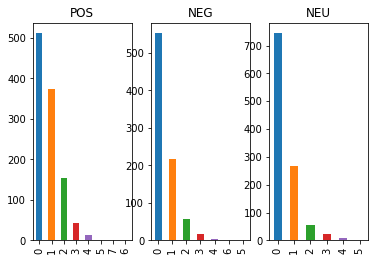

In [136]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(131)
df[df['Label']=='Positive']['pos_count'].value_counts().plot.bar(title='POS')
plt.subplot(132)
df[df['Label']=='Negative']['pos_count'].value_counts().plot.bar(title = 'NEG')
plt.subplot(133)
df[df['Label']=='Neutral']['pos_count'].value_counts().plot.bar(title = 'NEU')


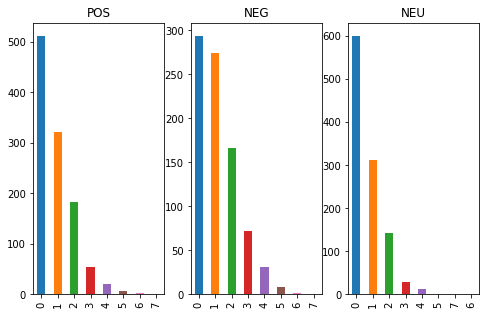

In [156]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(131)
df[df['Label']=='Positive']['pos_tagging_count'].value_counts().plot.bar(title='POS',figsize=(8,5))
plt.subplot(132)
df[df['Label']=='Negative']['pos_tagging_count'].value_counts().plot.bar(title='NEG')
plt.subplot(133)
df[df['Label']=='Neutral']['pos_tagging_count'].value_counts().plot.bar(title='NEU')


In [166]:
df.columns

Index(['citation', 'altid', 'count', 'profile_link', 'profile_name',
       'display_name', 'tweet_post', 'post_time', 'post_URL', 'article_name',
       'Language', 'sentiment', 'subjectivity', 'polarity', 'Label',
       'new_tweet_post', 'number_of_uppercase', 'number_of_urls',
       'number_of_hashtags', 'number_of_negation', 'neg_count', 'pos_count',
       'overall_score', 'pos_tagging_count', 'Exclamation_count',
       'question_mark_count', 'punc_count', 'user_mention_count',
       'pos_emo_count', 'neg_emo_count'],
      dtype='object')

In [193]:
df[df['Label']=='Positive']['number_of_urls'].value_counts()

1    878
0    108
2    105
3      8
5      1
Name: number_of_urls, dtype: int64

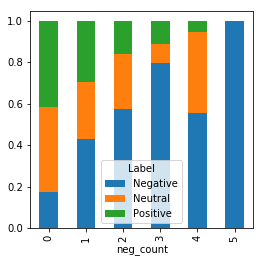

In [159]:
url=pd.crosstab(df['neg_count'],df['Label'])
url.div(url.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4), legend = True)

In [107]:
tweet = 'worst paper too sad never outstanding'

In [108]:
las_pol_2(tweet)

1
1


1

In [83]:
l = (tweet.split())[-1]

In [160]:
#number of adjectives, adverbs and verbs in a tweet
def pos_count(tweet):
    count = 0
    l = ['adj','adverb','verb']
    for i in tweet.split():
        if i in lexicon:
            #print(i)
            try:
                pos_tag = lexicon[i][1]
                if pos_tag in l:
                    #print(lexicon[i])
                    if lexicon[i][0] == 1:
                        count+=1

            except: 
                pass
    return count     

In [162]:
df['pos_tagg_pos_count'] = df['new_tweet_post'].apply(pos_count)

In [141]:
i = 'New'

In [142]:
lexicon[i]

[]

In [137]:
tweet = clean_tweet(tweet)
tweet = preprocess(tweet)

In [156]:
count = 0
l = ['adj','adverb','verb']
for i in tweet.split():
    if i in lexicon:
        print(i)
        try:
            pos_tag = lexicon[i][1]
            if pos_tag in l:
                print(lexicon[i])
                if lexicon[i][0] == -1:
                    count+=1
                    
        except: 
            pass
return count        

aggression
[-1, 'adj', -1, 'noun']
research
aggression
[-1, 'adj', -1, 'noun']
2


In [127]:
from nltk.corpus import stopwords
def remove_stopwords(tweet):
    """Remove stop words from list of tokenized words"""
    new_words = []
    words = tweet.split()
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    tweet = ' '.join(new_words)        
    return tweet

In [124]:
 tweet = remove_stopwords(tweet)

In [71]:
df['new_tweet_post'] = df['tweet_post'].apply(remove_stopwords)
df['new_title'] = df['article_name'].apply(remove_stopwords)

In [87]:
new_tweet_post = []
for article, tpost in zip(df.article_name, df.tweet_post):
    new_post = fuzzy_place_4(article, "title", tpost)
    new_tweet_post.append(new_post)

In [205]:
tweet = 'RT @autismcrisis: Autism means? Not a clear picture? https://t.co/kLZWAjfkar note: no SRS-asym…'
article_name = 'Association Between Chronic Physical Conditions and the Effectiveness of Collaborative Care for Depression'

In [206]:
fuzzy_place_3(article_name,'title',tweet)

'RT @autismcrisis: Autism means? Not a clear picture? https://t.co/kLZWAjfkar note: no SRS-asym…'